In [9]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import itertools
from sklearn.metrics.cluster import fowlkes_mallows_score
%run fm_index.ipynb
%run hopkins.ipynb

In [3]:
# Load experimental data
path_to_json = '../stimuli/clustering_data/' 
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

data = pd.DataFrame(columns=['base_uuid', 'clusters', 'participant', 'unique_uuid', 'group'])

# we need both the json and an index number so use enumerate()
index = 0
for _, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_data = json.load(json_file)
        for sample in json_data:
            data.loc[index] = np.array((sample["base_uuid"], sample["clusters"], sample["participant_id"], sample['unique_uuid'], sample['group']))
            index += 1
            # print(sample["clusters"])
            # for cluster in sample["clusters"]:
            #     plt.scatter(list(p["x"] for p in cluster), list(p["y"] for p in cluster))
        # # here you need to know the layout of your json and each json has to have
        # # the same structure (obviously not the structure I have here)


file 
ipykernel_launcher:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 
file 


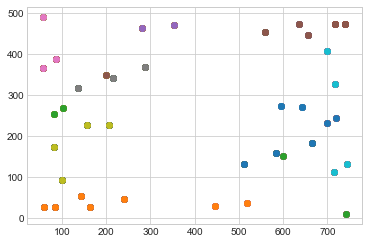

In [9]:
# for row in data.loc[data['base_uuid'] == "37ecaaa0-dbb1-4b98-ad55-ce73229d5866"].iterrows():
#     clusters = row[1][1]
#     for cluster in clusters:
#         plt.scatter(list(p["x"] for p in cluster), list(p["y"] for p in cluster))




In [5]:
# Each FM score is a r.v. sample it

fm_data = pd.DataFrame(columns=["base_uuid", "fm_score", "group"])
fm_data['fm_score'] = fm_data['fm_score'].astype(float)

uuids = data[["base_uuid"]]
index = 0
for index, uuid in uuids.iterrows():
    uuid = uuid["base_uuid"]
    # print(uuid)
    filtered_data = data.loc[data["base_uuid"] == uuid]
    # if len(filtered_data) > 0:
    #     points = np.array(np.concatenate(filtered_data.iloc[0]["clusters"]).flat)
    #     print(points)
    #     hopkins_statistic = hopkins(points)
    # print(filtered_data)
    cc = list(itertools.combinations(set(filtered_data["unique_uuid"]), 2))
    for pair in cc:
        # print(pair)
        cluster1 = list(data.loc[data["unique_uuid"] == pair[0]]["clusters"])[0]
        cluster2 = list(data.loc[data["unique_uuid"] == pair[1]]["clusters"])[0]

        fm_data.loc[index] = np.array((uuid, float(fm_index_points(cluster1, cluster2)), filtered_data.iloc[0]["group"]))
        index += 1

    # for sample in data.loc[data['base_uuid'] == uuid].iterrows():
        # print(row)

# avg over pairs of clusterings in base_uuid's samples

# cc = list(itertools.combinations(uuids, 2))
# print(cc)
# pd.DataFrame([data.loc[c,:].sum() for c in cc], index=cc)
fm_data['fm_score'] = pd.to_numeric(fm_data['fm_score'])


fm_data.head()


,base_uuid,fm_score,group
0,d26cc3de-4659-421d-a01c-1b05a01a5457,0.593617,disperse
1,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,0.653197,clustered
2,b3697dbc-04ee-4762-a98d-5773cf0c7e84,0.683130,clustered
3,8977f47a-e877-4e8c-aec8-0408550d3baf,0.746924,disperse
4,3c4d6c38-877b-41d2-b2b5-d2f74ef0970b,0.810643,clustered


In [6]:

summary = fm_data.groupby(['base_uuid', 'group']).agg({ 'fm_score': ['count', 'mean', 'std', 'median']})
print(summary)


                                               fm_score                 \
                                                  count      mean  std   
base_uuid                            group                               
0f18f0ad-f23d-4fc9-a761-3920c107550b clustered       94  0.286972  0.0   
0f9a9c80-cdab-4071-8d56-27965b585a10 disperse        94  0.401677  0.0   
2bb1495b-1ef6-4943-bb48-662371f50b30 clustered       94  0.428174  0.0   
2f24428f-632d-4374-b0ca-cb3d0ae04bc5 disperse        94  0.694808  0.0   
2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6 clustered       94  0.653197  0.0   
3088609a-8abd-42eb-9289-926728077ed5 disperse        94  0.683130  0.0   
339f68e4-98bf-4d4a-81c7-06fa958f307e clustered       94  0.746924  0.0   
37ce66b3-c54a-46ec-981d-96c33e8fba81 disperse        94  0.867399  0.0   
37ecaaa0-dbb1-4b98-ad55-ce73229d5866 clustered       93  0.557249  0.0   
3808a1ab-27ce-451f-bbd1-525f0e658c07 clustered       94  0.650376  0.0   
3c4d6c38-877b-41d2-b2b5-d2f74ef0970b c

In [10]:
# plot mean across all of them
plt.bar(list(p["mean"] for p in summary))


TypeError: tuple indices must be integers or slices, not str